***KNN With Decision Boundaries***

This is a notebook which will, when given some data, will work out K-NN for L1 and L2 norms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


In [2]:
def knn(X, y, n_neighbors):
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    for p in [1, 2]:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform', p=p)
        clf.fit(X, y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        score = clf.score(X, y)
        print("L{}: {}%".format(p, score*100))
        print("Error: {}%".format((1-score)*100))

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("2-Class classification (k = %i, Norm = L%i)"
                  % (n_neighbors, p))

    plt.show()

L1: 80.0%
Error: 19.999999999999996%
L2: 80.0%
Error: 19.999999999999996%


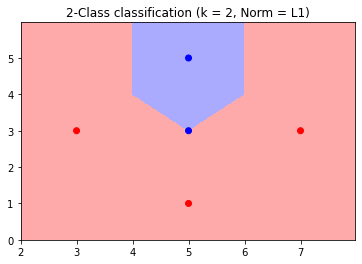

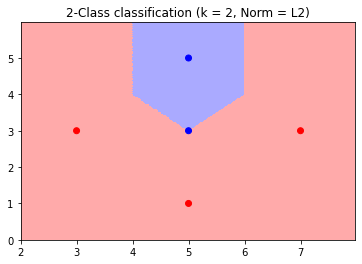

In [3]:
X = np.array([[5,5], [3,3], [7,3],[5,3],[5,1]])
y = np.array([1, -1, -1, 1, -1])

knn(X, y, 2)